In [1]:
import os
import sys
import numpy as np
import xarray as xr

In [2]:
import dask
import zarr

In [3]:
sys.path.insert(0, os.path.realpath('../libs/'))
import plevel_utils as pu

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# fn_static = '/glade/campaign/collections/rda/data/d559000/INVARIANT/USGS404_geo_em_d01.nc'
# ds_static = xr.open_dataset(fn_static)
# elev_var = ds_static['VAR'].values

In [6]:
# fn_static = '/glade/campaign/collections/rda/data/d559000/INVARIANT/wrfconstants_usgs404.nc'
# ds_static = xr.open_dataset(fn_static)
# lu = ds_static['LU_INDEX'].values

In [7]:
# plt.pcolormesh(veg[0, ...])

In [12]:
# xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_mean_1980_2019_12lev.nc')['WRF_MSLP'].values

In [11]:
fn_static = '/glade/campaign/collections/rda/data/d559000/INVARIANT/USGS404_geo_em_d01.nc'
ds_static = xr.open_dataset(fn_static)
ds_static = ds_static[['HGT_M', 'LANDMASK', 'VAR', 'XLONG_M', 'XLAT_M']]
ds_static = ds_static.rename({'XLONG_M': 'XLONG', 'XLAT_M': 'XLAT'})
ds_static = ds_static.squeeze(dim="Time")

data_elev = ds_static['HGT_M'].values
data_var = ds_static['VAR'].values

ds_static = ds_static.isel(west_east=slice(570, 905+1, 1), south_north=slice(200, 535+1, 1))

ds_static['z_norm'] = (ds_static['HGT_M'] - np.mean(data_elev)) / np.std(data_elev)
ds_static['var_norm'] = (ds_static['VAR'] - np.mean(data_var)) / np.std(data_var)

In [9]:
fn_static_wrf = '/glade/campaign/collections/rda/data/d559000/INVARIANT/wrfconstants_usgs404.nc'
ds_static_wrf = xr.open_dataset(fn_static_wrf)

ds_static_wrf = ds_static_wrf[['LU_INDEX', 'LAKEMASK', 'XLONG', 'XLAT']]
ds_static_wrf = ds_static_wrf.squeeze(dim="Time")
ds_static_wrf = ds_static_wrf.reset_coords(drop=True)
ds_static_wrf = ds_static_wrf.isel(west_east=slice(570, 905+1, 1), south_north=slice(200, 535+1, 1))
# lu = ds_static_wrf['LU_INDEX'].values
ds_static['lu_norm'] = ds_static_wrf['LU_INDEX'] / 17
ds_static['LAKEMASK'] = ds_static_wrf['LAKEMASK']

In [10]:
varnames = list(ds_static.keys())

# zarr encodings
dict_encoding = {}

chunk_size_2d = dict(chunks=(336, 336))

compress = zarr.Blosc(cname='zstd', clevel=1, shuffle=zarr.Blosc.SHUFFLE, blocksize=0)

for i_var, var in enumerate(varnames):
    dict_encoding[var] = {'compressor': compress, **chunk_size_2d}

In [11]:
save_name = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/static/C404_GP_static_LAKE.zarr'
# ds_static.to_zarr(save_name, mode='w', consolidated=True, compute=True, encoding=dict_encoding)

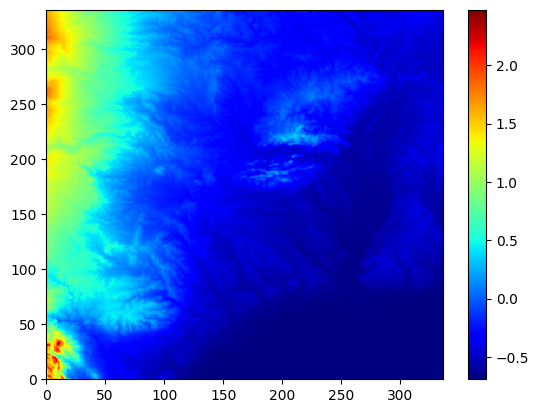

In [17]:
plt.pcolormesh(ds_static['z_norm'].values, cmap=plt.cm.jet)
plt.colorbar()

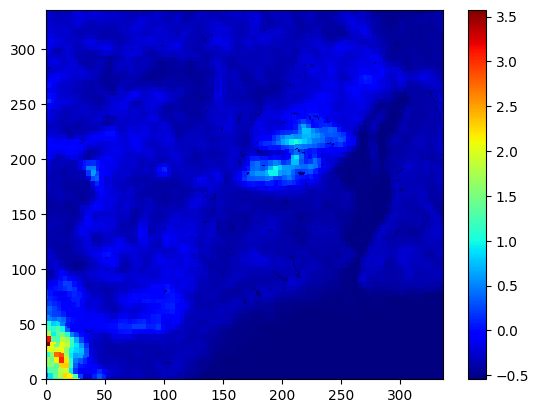

In [19]:
plt.pcolormesh(ds_static['var_norm'].values, cmap=plt.cm.jet)
plt.colorbar()

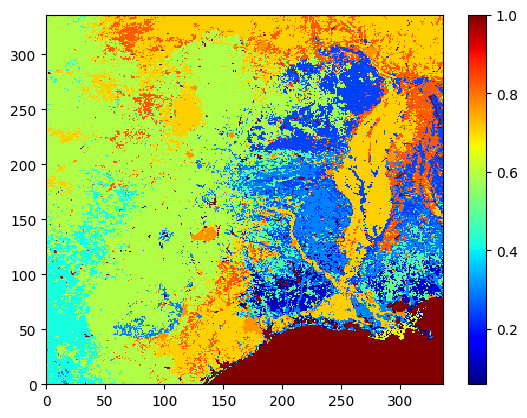

In [18]:
plt.pcolormesh(ds_static['lu_norm'].values, cmap=plt.cm.jet)
plt.colorbar()

In [26]:
lon_grids

array([[-102.46948 , -102.42911 , -102.38873 , ...,  -89.02554 ,
         -88.98547 ,  -88.945404],
       [-102.47156 , -102.43118 , -102.39078 , ...,  -89.021515,
         -88.981445,  -88.941345],
       [-102.47363 , -102.43323 , -102.39282 , ...,  -89.01749 ,
         -88.97739 ,  -88.93729 ],
       ...,
       [-103.28656 , -103.23901 , -103.19147 , ...,  -87.44861 ,
         -87.40155 ,  -87.35449 ],
       [-103.28946 , -103.24188 , -103.194305, ...,  -87.443054,
         -87.395935,  -87.34888 ],
       [-103.29236 , -103.24475 , -103.19714 , ...,  -87.43744 ,
         -87.39035 ,  -87.34323 ]], dtype=float32)

In [27]:
lat_grids

array([[27.870647, 27.872475, 27.874302, ..., 27.58118 , 27.577621,
        27.574013],
       [27.90633 , 27.908161, 27.909992, ..., 27.616703, 27.613125,
        27.609547],
       [27.942032, 27.94387 , 27.945671, ..., 27.652233, 27.648647,
        27.645054],
       ...,
       [39.924408, 39.926624, 39.928806, ..., 39.575645, 39.57135 ,
        39.567024],
       [39.96088 , 39.96309 , 39.965282, ..., 39.611923, 39.60762 ,
        39.60329 ],
       [39.99735 , 39.999557, 40.001743, ..., 39.648205, 39.6439  ,
        39.639576]], dtype=float32)